In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# Reading data
Our data for this problem is a file of Google shares that has been provided on the offending days.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving GOOGL.csv to GOOGL.csv


In [3]:
df = pd.read_csv("GOOGL.csv")

In [4]:
df.head()

,Date,Open,High,Low,Open.1,Volume,Name
0,1/3/2006,211.47,218.05,209.32,217.83,13137450,GOOGL
1,1/4/2006,222.17,224.70,220.09,222.84,15292353,GOOGL
2,1/5/2006,223.22,226.00,220.97,225.85,10815661,GOOGL
3,1/6/2006,228.66,235.49,226.85,233.06,17759521,GOOGL
4,1/9/2006,233.44,236.94,230.70,233.68,12795837,GOOGL


With having the opularity of python through years 2005 to 2015, we want to predict its popularity in 2020.
# Linear Regression
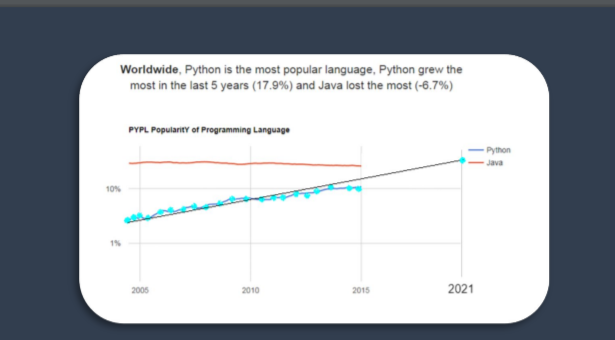

As shown in the plot, we can not find a linear relationship in which our data can be accurately predicted, but we can find a line that has the shortest distance from the set of points, and in this case, hope that our estimate of Python's popularity would have the least error. Basically, we hope that the relationship between the time variable and the popularity of Python is a linear one and progresses linearly.


At first, we use linear regression to solve the following matrix: \\
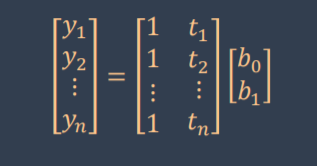

In [5]:
answers = df.head(len(df.Open) - 10).Open.to_list()

matrix = np.zeros(2)
matrix[0] = 1
matrix[1] = 1
for i in range(1, len(df) - 10):
    rw = np.zeros(2)
    rw[0] = 1
    rw[1] = i
    matrix = np.vstack((matrix, rw))


answers = np.array(answers)

a = np.dot(matrix.transpose(), matrix)
b = np.dot(matrix.transpose(), answers)
x = np.linalg.solve(a, b)

In [6]:
for i in range(len(df) - 10, len(df)):
    print("actual value : ", df.Open[i])
    print("calculated value : ", np.dot([1, i], x))
    print(f"error : {abs(df.Open[i] - np.dot([1, i], x))}")

actual value :  1063.78
calculated value :  790.6171761692987
error : 273.1628238307013
actual value :  1076.45
calculated value :  790.8594022364614
error : 285.59059776353865
actual value :  1083.02
calculated value :  791.1016283036241
error : 291.91837169637586
actual value :  1080.92
calculated value :  791.3438543707869
error : 289.5761456292132
actual value :  1075.39
calculated value :  791.5860804379496
error : 283.8039195620505
actual value :  1070.0
calculated value :  791.8283065051123
error : 278.1716934948877
actual value :  1068.64
calculated value :  792.070532572275
error : 276.56946742772504
actual value :  1066.6
calculated value :  792.3127586394378
error : 274.2872413605621
actual value :  1062.25
calculated value :  792.5549847066005
error : 269.6950152933995
actual value :  1055.49
calculated value :  792.7972107737633
error : 262.69278922623675


In [10]:
matrix_2 = np.zeros(3)
matrix_2[0] = 1
matrix_2[1] = 1
matrix_2[2] = 1
for i in range(1, len(df) - 10):
    rw = np.zeros(3)
    rw[0] = 1
    rw[1] = i
    rw[2] = i*i
    matrix_2 = np.vstack((matrix_2, rw))
matrix_2 = np.array(matrix_2)
a1 = np.transpose(matrix_2).dot(matrix_2)
b1 = np.transpose(matrix_2).dot(answers)

x1 = np.linalg.solve(a1, b1)
print(x1)


[ 2.64606276e+02 -1.62523204e-01  1.34557485e-04]


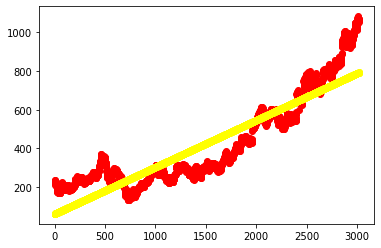

In [7]:
x_cords = range(len(df))
y_cords = []
for i in x_cords:
    y_cords.append(np.dot([1, i], x))
plt.scatter(x_cords, df.Open.to_list(), color='red', label='Open')

plt.scatter(x_cords, y_cords, color='Yellow', label='LinearPrediction')


# Polynomial Regression
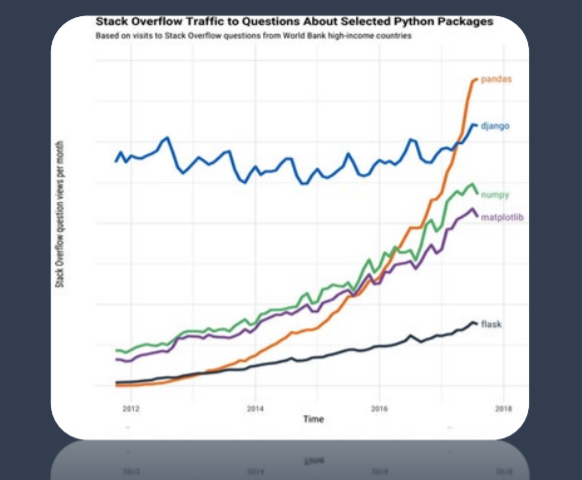

The photo above is a comparison of the number of questions asked about each of the famous Python packages.Suppose we want to predict the number of questions asked about the Panda package in 2021. The diagram shows that choosing a linear relation close to the data will not result in a close relationship to reality, and the farther we go from the real data, the greater the prediction error, but it seems that the relation can be close to a quadratic polynomial. Polynomials can make estimates with less error.So we need to find the following polynomials that are closest to the actual values:

$y(t) = b_0 + b_1t + b_2t^2$ \\
And this means that in the ideal state of the chart we expect that:
$y(t_1) = b_0 + b_1t_1 + b_2{t_1}^2$ \\
$y(t_2) = b_0 + b_1t_2 + b_2{t_2}^2$ \\
. \\
. \\
. \\
$y(t_n) = b_0 + b_1t_n + b_2{t_n}^2$ \\
And if we write the above equations in matrix form: \\
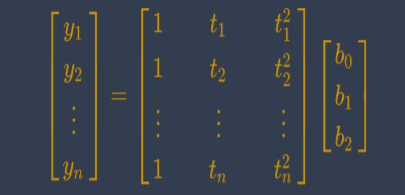


By placing the time and number of questions, we solve the matrix and get the exact coefficients. But as mentioned before, this only applies to the ideal state. For other cases, we need to find coefficients that are closest to the original graph, and to do this we need to use the least squares method\. 

Least Squares Problem
Consider the matrix $Ax = b$. Consider a situation where the value of $x$ is not found for the answer. In this case we are looking for the vector closest to $b$ that holds in this equation.
Projection of $b$ on $A$ is the closest vector.
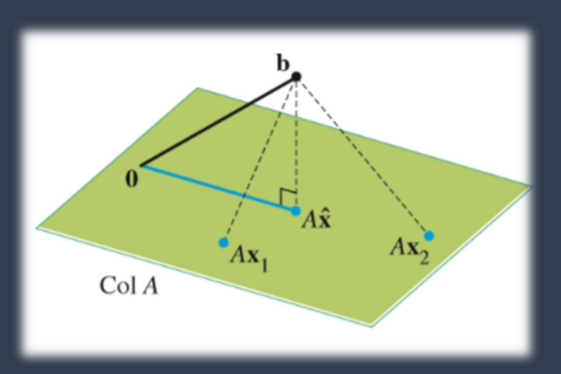

Now we update our model using least squares problem.

In [12]:
error_sum1 = 0
predictions_2 = []
for i in range(len(df) - 10, len(df)):
    print("actual value : ", df.Open[i])
    print("calculated value : ", np.dot([1, i, i*i], x1))
    predictions_2.append(np.dot([1, i, i*i], x1))
    error_sum1 += abs(df.Open[i] - np.dot([1, i, i*i], x1))
    print(abs(df.Open[i] - np.dot([1, i, i*i], x1)))


actual value :  1063.78
calculated value :  993.8683205923369
69.91167940766309
actual value :  1076.45
calculated value :  994.5156988887848
81.93430111121529
actual value :  1083.02
calculated value :  995.1633463002022
87.85665369979779
actual value :  1080.92
calculated value :  995.811262826589
85.1087371734111
actual value :  1075.39
calculated value :  996.4594484679452
78.93055153205489
actual value :  1070.0
calculated value :  997.1079032242708
72.89209677572921
actual value :  1068.64
calculated value :  997.7566270955659
70.88337290443417
actual value :  1066.6
calculated value :  998.4056200818305
68.19437991816937
actual value :  1062.25
calculated value :  999.0548821830645
63.19511781693552
actual value :  1055.49
calculated value :  999.7044133992679
55.78558660073213


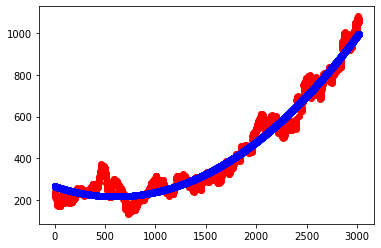

In [14]:
y_cords1 = []
for i in x_cords:
    y_cords1.append(i*i*x1[2] + i*x1[1] + x1[0])
    # y_cords = [i*i*x1[2] + i*x1[1] + x1[0] for i in x_cords]
plt.scatter(x_cords, df.Open.to_list(), color='red', label='Open')
plt.scatter(x_cords, y_cords1, color='Blue', label='PolynomialPrediction')
